In [1]:
##tools
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [2]:
##Creating Arxiv tool
api_arxiv_wrapper = ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv = ArxivQueryRun(api_wrapper=api_arxiv_wrapper, description="Query Arxiv Papers")
print(arxiv.name)

arxiv


In [4]:
##Testing Arxiv to fetch research papers
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
##Creating Wikipedia tool
api_wiki_wrapper = WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki = WikipediaQueryRun(api_wrapper=api_wiki_wrapper, description="Fetcing from Wiki")
wiki.name

'wikipedia'

In [6]:
from dotenv import load_dotenv
load_dotenv()
import os
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")
os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")

In [7]:
##creatin Tavily tool for searching from web
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()

C:\Users\Jamadagni\AppData\Local\Temp\ipykernel_6708\324114086.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [8]:
##calling web 
tavily.invoke("Recent news on AI")

[{'title': 'The latest AI news we announced in October - The Keyword',
  'url': 'https://blog.google/technology/ai/google-ai-updates-october-2025/',
  'content': '"The Latest AI News We Announced in October" highlights Google\'s recent AI advancements.\n Google\'s AI breakthroughs include a quantum algorithm faster than supercomputers.\n An AI model called Cell2Sentence-Scale may offer a new cancer therapy pathway.\n Gemini Enterprise is now the "front door" for Google AI in the workplace.\n New AI security features protect against scams, plus Google Home gets AI upgrades.\n\n## Shakespeare-ish [...] # The latest AI news we announced in October\n\nNov 04, 2025\n\nHere’s a recap of some of our biggest AI updates from October, including Gemini Enterprise, an AI model to accelerate cancer research and a big quantum computing breakthrough.\n\nSuperG\n\n## General summary [...] In October Google made advancements in AI to improve daily life. Google introduced Gemini for Home and vibe coding

In [9]:
##Combine all these tools in the list
tools = [arxiv, wiki, tavily]

In [10]:
##Initialize the LLM model
from langchain_groq import ChatGroq
llm =ChatGroq(model="qwen/qwen3-32b")

In [11]:
llm.invoke("who is pm of india")

AIMessage(content='<think>\nOkay, so the user is asking who the Prime Minister of India is. Let me start by recalling the current government structure in India. India is a parliamentary democracy, so the Prime Minister is the head of government. The President is the head of state, but the Prime Minister holds the executive power.\n\nAs of my last update, the Prime Minister of India is Narendra Modi. He has been in office since 26 May 2014, and he was re-elected in 2019. I should check if there have been any changes since then. Let me think—no, I don\'t recall any recent elections or changes in leadership. The next general election is scheduled for 2024, so he should still be in office unless there\'s been an unexpected development.\n\nWait, the user might be asking for a more detailed answer. Let me confirm. The user just asked "who is pm of india" so maybe they want a straightforward answer, but sometimes people might want a bit more context. Let me make sure to mention the dates and 

In [12]:
## to bind the list of tools to our current LLm
llm_with_tools = llm.bind_tools(tools=tools)

In [13]:
## Execute the call or query using LLM which will use the available tools based on the query
llm_with_tools.invoke("what is the latest newson AI")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking for the latest news on AI. I need to figure out which tool to use here. The available tools are arxiv, wikipedia, and tavily_search_results_json. \n\nArxiv is for academic papers, which might not be the best for current news. Wikipedia is good for general information but might not have the most up-to-date news. The user mentioned "latest news," so they probably want recent developments. Tavily search is optimized for current events, so that\'s the best choice here.\n\nI should call tavily_search_results_json with the query "latest news on AI." Let me make sure the parameters are correct. The function requires a query string. Yep, that\'s set. I\'ll structure the tool call accordingly.\n', 'tool_calls': [{'id': 'xh8d7frnv', 'function': {'arguments': '{"query":"latest news on AI"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 18

In [14]:
llm_with_tools.invoke("what is the latest research on Quantum computing")

AIMessage(content='', additional_kwargs={'reasoning_content': 'Okay, the user is asking about the latest research on quantum computing. I need to figure out which tool to use here. Let me check the available functions. There\'s arxiv, wikipedia, and tavily_search.\n\nArxiv is great for academic papers, which would give recent research papers. Wikipedia might have general information but not the very latest. Tavily search is for current events and comprehensive results. Since quantum computing is a fast-moving field, the latest research would probably be best found on arxiv. Let me confirm by using arxiv with the query "latest research on Quantum computing". That should fetch recent papers. I\'ll call the arxiv function with that query.\n', 'tool_calls': [{'id': 'x16ejqf11', 'function': {'arguments': '{"query":"latest research on Quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 323, 'total_tokens

Workflow


In [15]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated ##labelling
from langgraph.graph.message import add_messages ## Reducers in langgraph

In [16]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]



In [19]:
## chatbot with langgraph nodes flow

from  IPython.display import display, Image
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode ## builtin node for tools
from langgraph.prebuilt import tools_condition ## it LLm calls tool what path to take if not what path

In [ ]:
## Node definition

def tool_calling_llm(state:State):
    return{"messages" :[llm_with_tools.invoke(state["messages"])]}

# build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

#Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges("tool_calling_llm",tools_condition) # based on the condition it will call tool node

builder.add_edge("tools", END)
#builder.add_edge("tools", "tool_calling_llm")

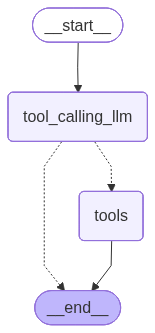

In [27]:
# compile the langgraph and display the graph
graph = builder.compile()
display(Image(graph.get_graph().draw_mermaid_png()))

In [28]:
# invoking chatbot
messages = graph.invoke({"messages": "1706.03762"})
for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (b2rszcb1p)
 Call ID: b2rszcb1p
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [29]:
## LLM call using chatbot
# invoking chatbot
messages = graph.invoke({"messages": "hi, myname is mohan"})
for msg in messages['messages']:
    msg.pretty_print()

================================ Human Message =================================

hi, myname is mohan
================================== Ai Message ==================================

Hello, Mohan! How can I assist you today? Feel free to ask me any questions you have. 😊
